In [1]:
!kaggle datasets download mathchi/diabetes-data-set

Dataset URL: https://www.kaggle.com/datasets/mathchi/diabetes-data-set
License(s): CC0-1.0
diabetes-data-set.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
!tar -xf diabetes-data-set.zip

In [3]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 19.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 33.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 23.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 24.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25/25 [tensorflow]5 [tensorflow]-py]a-server]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
# import librariees:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import sklearn
from sklearn.preprocessing import StandardScaler

2025-09-30 09:57:38.538492: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-30 09:57:39.520384: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-30 09:57:44.550111: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark  = SparkSession.builder.appName("CancerTest").getOrCreate()

In [ ]:
df = spark.read.csv('diabetes.csv', header=True, inferSchema=True)

### Functions for Logistic Regression

![sigmoid](sigmoid.png "Sigmoid function")

1. Sigmoid to seperate out the classes

In [5]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

2. Now that we can seperate out the classes we need to see our loss

![Log likelihood](loss.png "Log Likelihood")

In [6]:
def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) + (1-y)*np.log(1-y_hat))
    return loss

3. Now we start our gradient descent , we begin with finding the gradients

![Update](updatingmx.png "Update w and b")

In [7]:
def gradients(X, y, y_hat): # please note this method calculates the gradient and updates w and b 

    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).

    # m-> number of training examples.
    m = X.shape[0]

    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y)) # the 1/m returns the average over all training sizes (no exploding gradients)

    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y))

    return dw, db

Normalize the data so that it is nice and easy to train 

In [8]:
def normalize(X):

    # X --> Input.

    # m-> number of training examples
    # n-> number of features
    m, n = X.shape

    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)

    return X

TRAIN !!!!!! 

In [9]:
def train(X, y, bs, epochs, lr):

    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.

    # m-> number of training examples
    # n-> number of features
    m, n = X.shape

    # 1. Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0

    # Reshaping y.
    y = y.reshape(m,1) # just some coding semantics to make sure python is happy 

    #2.  Normalizing the inputs.
    x = normalize(X)

    # Empty list to store losses.
    losses = []

    # 3. Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):

            # 3.1 Defining batches. SGD.- batches just lets us train faster this code: 
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]

            # 3.2 Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b) #<--------Linear combination and Sigmoid)

            #3.3  Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)

            # Updating the parameters with the learning rate .
            w -= lr*dw
            b -= lr*db
            print('weights',w)
            print('biases',b)

        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))#<-------------Linear combination is here !!!!
        print('loss',l)
        losses.append(l)

    # returning weights, bias and losses(List).
    print(f"\nTraining completed!")
    print(f"Weights: {[f'{x:.4f}' for x in w.flatten()]}")
    print(f"Bias: {b:.4f}")
    print(f"Final Loss: {losses[-1]:.4f}")
    return w, b, losses

Plot the decision boundry - stolen from internet

In [10]:
def plot_decision_boundary(X, w, b):

    # X --> Inputs
    # w --> weights
    # b --> bias

    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c

    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlim([-2, 2])
    plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

In [11]:
def predict(X):

    # X --> Input.

    # Normalizing the inputs.
    x = normalize(X)

    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)

    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 0
    pred_class = [1 if i > 0.5 else 0 for i in preds]

    return np.array(pred_class)

In [12]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

In [13]:
df = pd.read_csv('diabetes.csv')

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
scaler = StandardScaler()

In [16]:
y= df['Outcome']

In [17]:
y_array =np.array(y) #<-------Needed because we are reshaping the array in the train method

In [18]:
unscaled_X= df.drop(['Outcome'],axis=1)

In [19]:
X = scaler.fit_transform(unscaled_X)

In [20]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
w, b, l = train(X, y_array, bs=100, epochs=1000, lr=0.01)

weights [[0.00075684]
 [0.0023649 ]
 [0.00074895]
 [0.00059575]
 [0.00125285]
 [0.00193176]
 [0.00086251]
 [0.00158375]]
biases -0.0013000000000000002
weights [[0.00216625]
 [0.00484637]
 [0.00113358]
 [0.00109816]
 [0.00218839]
 [0.00358816]
 [0.00216538]
 [0.00293335]]
biases -0.002496248929008191
weights [[0.0032159 ]
 [0.00621317]
 [0.00078019]
 [0.00079516]
 [0.00215891]
 [0.00470458]
 [0.00333192]
 [0.00353744]]
biases -0.003594689102313844
weights [[0.00445166]
 [0.00860782]
 [0.00114872]
 [0.00088856]
 [0.00222177]
 [0.0062087 ]
 [0.00369956]
 [0.00466951]]
biases -0.004785468138906937
weights [[0.00527547]
 [0.0106618 ]
 [0.00100159]
 [0.00121391]
 [0.00334455]
 [0.00767033]
 [0.00412014]
 [0.00493221]]
biases -0.006771186994783819
weights [[0.00592048]
 [0.01321005]
 [0.00193572]
 [0.00210453]
 [0.00414624]
 [0.0092021 ]
 [0.00496814]
 [0.00593463]]
biases -0.009147233317987884
weights [[0.00752109]
 [0.01533696]
 [0.00205485]
 [0.00294884]
 [0.00476344]
 [0.0102954 ]
 [0.005

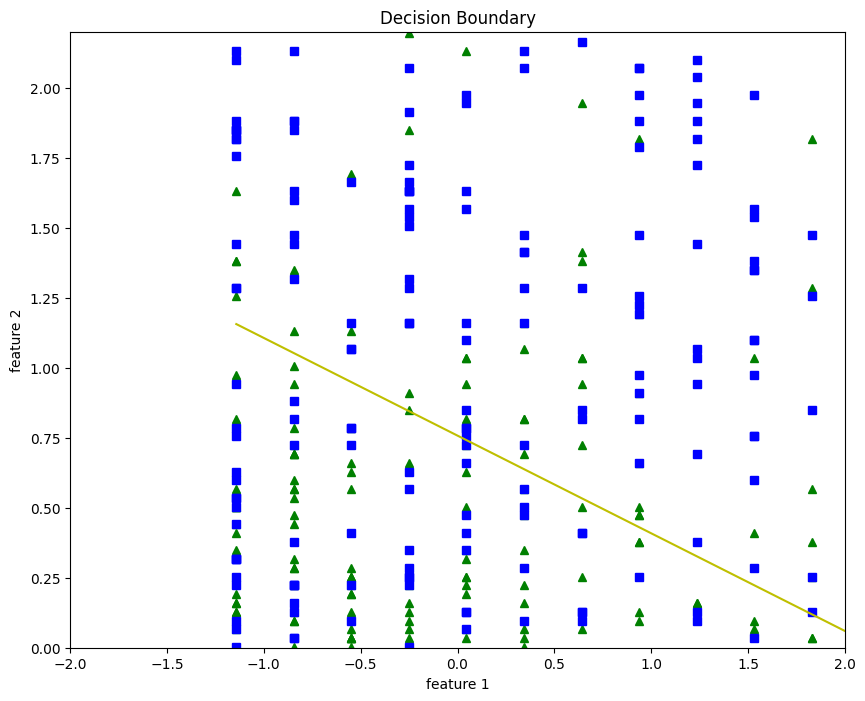

In [22]:
plot_decision_boundary(X, w, b)

In [23]:
y_hat=predict(X)

In [24]:
accuracy(y, y_hat)

np.float64(0.7838541666666666)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# 1. Confusion Matrix
cm = confusion_matrix(y, y_hat)
print("Confusion Matrix:")
print(cm)

# 2. Classification Report
print("\nClassification Report:")
print(classification_report(y, y_hat))

Confusion Matrix:
[[445  55]
 [111 157]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.59      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.74      0.75       768
weighted avg       0.78      0.78      0.78       768



<Axes: >

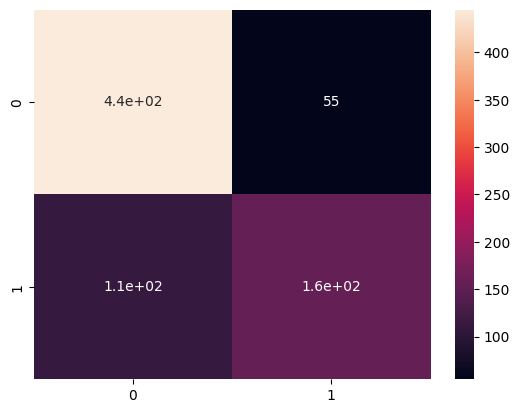

In [27]:
sns.heatmap(cm,annot=True)

<Axes: xlabel='Outcome', ylabel='Count'>

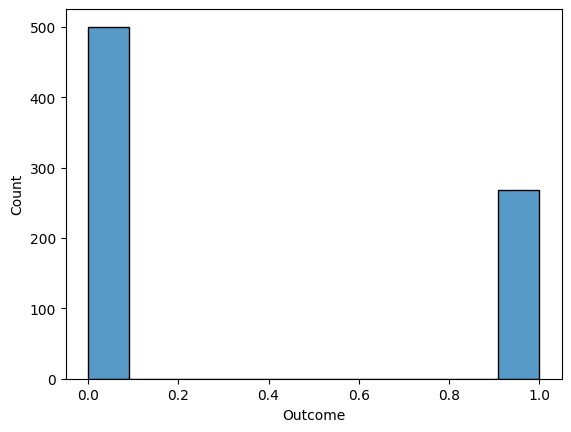

In [28]:
sns.histplot(df['Outcome'])

In [29]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [30]:
df_0 = df[df['Outcome'] == 0].sample(n=200, random_state=42)
df_1 = df[df['Outcome'] == 1].sample(n=200, random_state=42)

# Combine and shuffle
balanced_df = pd.concat([df_0, df_1]).sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Final balanced dataset: {len(balanced_df)} records")
print(f"Class counts: {balanced_df['Outcome'].value_counts().sort_index()}")

Final balanced dataset: 400 records
Class counts: Outcome
0    200
1    200
Name: count, dtype: int64


In [31]:
balanced_y = balanced_df['Outcome']

In [32]:
balanced_unscaled_X = balanced_df.drop(['Outcome'],axis=1)

In [33]:
scaled_balanced_X = scaler.fit_transform(balanced_unscaled_X)

In [34]:
balanced_y_array = np.array(balanced_y)

In [35]:
w2, b2, l2 = train(scaled_balanced_X, balanced_y_array, bs=100, epochs=1000, lr=0.01)

weights [[0.00138626]
 [0.00301469]
 [0.00067967]
 [0.00070141]
 [0.00139617]
 [0.00156575]
 [0.00036654]
 [0.00168472]]
biases -0.0002
weights [[0.00227308]
 [0.00584972]
 [0.00137608]
 [0.00151358]
 [0.00205031]
 [0.00364842]
 [0.00097096]
 [0.00248447]]
biases -0.000698372663362358
weights [[0.00366653]
 [0.00775834]
 [0.00140727]
 [0.00196087]
 [0.00277517]
 [0.00532787]
 [0.00173995]
 [0.00378148]]
biases -0.00029394606843353294
weights [[0.00449429]
 [0.01022327]
 [0.00156549]
 [0.00396715]
 [0.00444108]
 [0.00668172]
 [0.00273474]
 [0.00518622]]
biases 1.708513012225099e-06
loss 0.6871201234438777
weights [[0.00585822]
 [0.01319254]
 [0.00223062]
 [0.00464914]
 [0.00580434]
 [0.00822015]
 [0.00308578]
 [0.00684424]]
biases -0.0001995324715266258
weights [[0.00672726]
 [0.01599017]
 [0.002911  ]
 [0.00543967]
 [0.00643962]
 [0.01027233]
 [0.00367392]
 [0.00761968]]
biases -0.0006946182253976936
weights [[0.00810212]
 [0.01785558]
 [0.0029085 ]
 [0.00586295]
 [0.00712514]
 [0.0119

In [36]:
y_hat2=predict(scaled_balanced_X)

In [37]:
accuracy(balanced_y, y_hat2)

np.float64(0.725)

In [38]:
# 1. Confusion Matrix
cm2 = confusion_matrix(balanced_y, y_hat2)
print("Confusion Matrix:")
print(cm2)

# 2. Classification Report
print("\nClassification Report:")
print(classification_report(balanced_y, y_hat2))

Confusion Matrix:
[[188  12]
 [ 98 102]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.94      0.77       200
           1       0.89      0.51      0.65       200

    accuracy                           0.72       400
   macro avg       0.78      0.72      0.71       400
weighted avg       0.78      0.72      0.71       400



<Axes: >

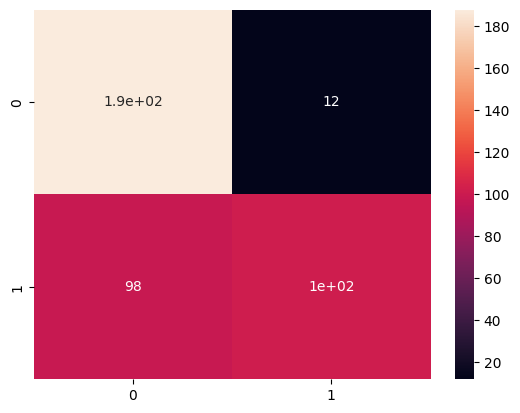

In [39]:
sns.heatmap(cm2, annot=True)

In [40]:


def plot_decision_boundaryv2(X, y, w, b):
    """
    Plots the decision boundary for a logistic regression model.

    Args:
        X (np.ndarray): The feature data, assumed to be 2-dimensional.
        y (np.ndarray): The true class labels.
        w (np.ndarray): The calculated weights (coefficients).
        b (float): The calculated bias (intercept).
    """
    # Scatter plot the original data points
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], color='blue', label='Class 0', marker='o')
    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], color='red', label='Class 1', marker='x')

    # Define the range for the decision boundary line
    x_values = np.array([np.min(X[:, 0]), np.max(X[:, 0])])

    # Calculate the corresponding y values for the line using the formula
    y_values = -(w[0] * x_values + b) / w[1]

    # Plot the decision boundary line
    plt.plot(x_values, y_values, 'k-', label='Decision Boundary')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.legend()
    plt.grid(True)
    plt.show()

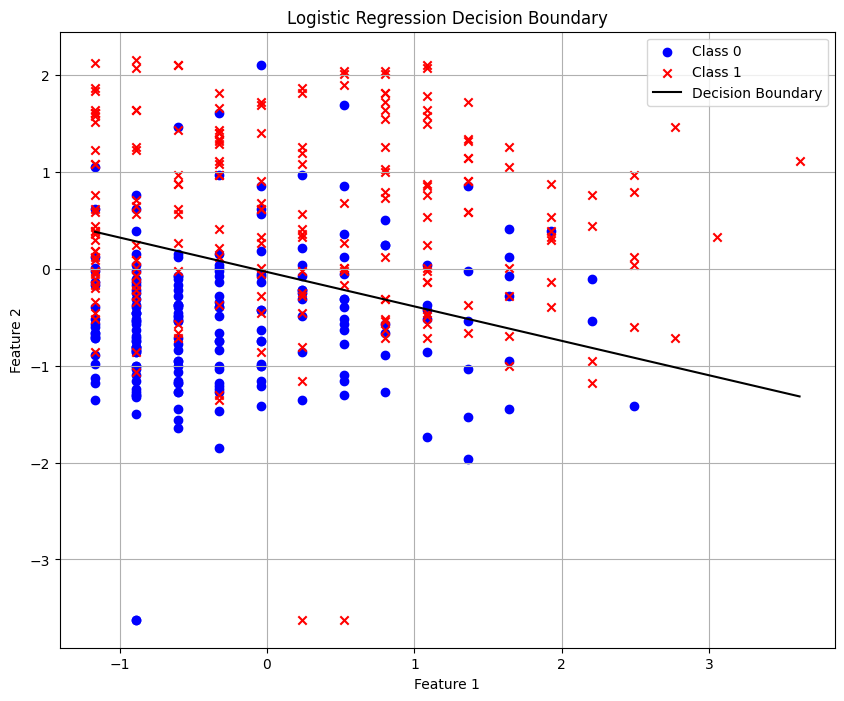

In [41]:
plot_decision_boundaryv2(scaled_balanced_X, balanced_y, w2, b2)

In [42]:
from sklearn.metrics import roc_curve, auc

In [43]:
fpr1, tpr1, thresholds1 = roc_curve(balanced_y, y_hat2)
roc_auc1 = auc(fpr1, tpr1)
print('ROC',roc_auc1)

ROC 0.725
